In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt

In [2]:
PROCESSED_FOLDER = "processed_data"

from google.colab import files
uploaded = files.upload()

# Extract ZIP
zip_filename = list(uploaded.keys())[0]
extracted_folder = "extracted_data"
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Create output folder
if os.path.exists(PROCESSED_FOLDER):
    shutil.rmtree(PROCESSED_FOLDER)
os.makedirs(PROCESSED_FOLDER)

Saving Next_4_classes.zip to Next_4_classes.zip


In [3]:
TARGET_FRAMES = 20
MIN_FRAMES = 20

def process_csv(file_path):
    if os.stat(file_path).st_size == 0:
        return None

    df = pd.read_csv(file_path)

    if df.empty:
        return None

    num_lines = len(df)

    if num_lines < MIN_FRAMES:
        return None

    if num_lines < TARGET_FRAMES:
        new_indices = np.linspace(0, num_lines - 1, TARGET_FRAMES).astype(int)
    else:
        new_indices = np.random.choice(np.arange(num_lines), TARGET_FRAMES, replace=False)
        new_indices.sort()

    new_df = df.iloc[new_indices]

    return new_df

In [4]:
import os
import shutil
from google.colab import files


for root, _, files_in_dir in os.walk(extracted_folder):
    for file in files_in_dir:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            processed_df = process_csv(file_path)

            if processed_df is not None:
                rel_path = os.path.relpath(file_path, extracted_folder)
                save_path = os.path.join(PROCESSED_FOLDER, rel_path)
                os.makedirs(os.path.dirname(save_path), exist_ok=True)
                processed_df.to_csv(save_path, index=False)

shutil.make_archive("FINAL4processed_data", 'zip', PROCESSED_FOLDER)
files.download("FINAL4processed_data.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import os
import zipfile
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
from google.colab import files
import zipfile
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

uploaded = files.upload()

zip_file_name = list(uploaded.keys())[0]
extracted_folder = '/content/extracted_files'
os.makedirs(extracted_folder, exist_ok=True)

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

categories_folder = os.path.join(extracted_folder, 'Processed_files') # change this whenever dataset changes!!!!
categories = os.listdir(categories_folder)
all_data = []
all_labels = []

print("Categories found:", categories)

for category in categories:
    category_folder = os.path.join(categories_folder, category)
    if os.path.isdir(category_folder):
        category_files = os.listdir(category_folder)

        num_files = len([file for file in category_files if file.endswith('.csv')])
        print(f"Category: {category}, Number of files: {num_files}")

        for file in category_files:
            if file.endswith('.csv'):
                csv_path = os.path.join(category_folder, file)
                df = pd.read_csv(csv_path)

                if df.empty:
                    print(f"Warning: Empty CSV file detected: {csv_path}")
                else:
                    features = df.iloc[:, :-1].values
                    label = category

                    all_data.append(features)
                    all_labels.append(label)

if not all_data:
    print("Error: No data was loaded. Please check your CSV files and folder structure.")
else:
    print(f"Data loaded successfully. Number of samples: {len(all_data)}")

Saving FINAL652PM.zip to FINAL652PM.zip
Categories found: ['Swiping Up', '.DS_Store', 'Sliding Two Fingers Left', 'Zooming Out With Two Fingers', 'Zooming In With Two Fingers', 'Doing other things', 'Turning Hand Clockwise', 'Sliding Two Fingers Down', 'Thumb Down', 'Swiping Down', 'Swiping Right', 'Zooming Out With Full Hand', 'Sliding Two Fingers Right', 'Sliding Two Fingers Up', 'Turning Hand Counterclockwise', 'Shaking Hand', 'Thumb Up', 'Zooming In With Full Hand', 'Swiping Left']
Category: Swiping Up, Number of files: 877
Category: Sliding Two Fingers Left, Number of files: 187
Category: Zooming Out With Two Fingers, Number of files: 654
Category: Zooming In With Two Fingers, Number of files: 737
Category: Doing other things, Number of files: 934
Category: Turning Hand Clockwise, Number of files: 524
Category: Sliding Two Fingers Down, Number of files: 157
Category: Thumb Down, Number of files: 499
Category: Swiping Down, Number of files: 760
Category: Swiping Right, Number of fi

In [6]:
if len(all_data) > 0:
    all_data = np.vstack(all_data)
    all_labels = np.array(all_labels)

    print(f"Number of samples in all_data: {len(all_data)}")
    print(f"Number of samples in all_labels: {len(all_labels)}")

from sklearn.preprocessing import StandardScaler

def extract_features(sequences):
    features = []
    for seq in sequences:
        mean = np.mean(seq, axis=0)
        std = np.std(seq, axis=0)
        features.append(np.concatenate([mean, std]))
    return np.array(features)

sequence_length = 30

Number of samples in all_data: 201080
Number of samples in all_labels: 10054


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

def create_sequences(data, labels, sequence_length):
    sequences = []
    sequence_labels = []

    num_sequences = min(len(data) // sequence_length, len(labels))

    for i in range(num_sequences):
        sequences.append(data[i * sequence_length:(i + 1) * sequence_length])

        sequence_labels.append(labels[i])

    return np.array(sequences), np.array(sequence_labels)


sequence_length = 20

sequences, sequence_labels = create_sequences(all_data, all_labels, sequence_length)

X = sequences.reshape(sequences.shape[0], -1)
y = sequence_labels

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.6, random_state=42)

for train_val_idx, test_idx in sss.split(X, y):
    X_train, X_temp = X[train_val_idx], X[test_idx]
    y_train, y_temp = y[train_val_idx], y[test_idx]

sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.75, random_state=42)

for train_idx, val_idx in sss_val.split(X_temp, y_temp):
    X_test, X_val = X_temp[train_idx], X_temp[val_idx]
    y_test, y_val = y_temp[train_idx], y_temp[val_idx]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Shape of X: (10054, 1680)
Shape of y: (10054,)
Validation Accuracy: 81.26%
Test Accuracy: 82.23%


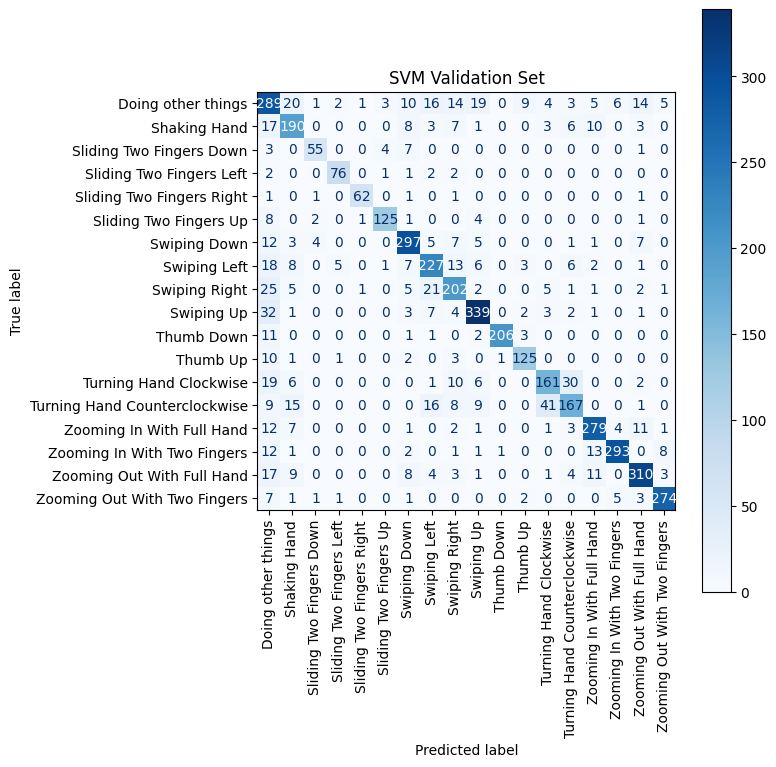

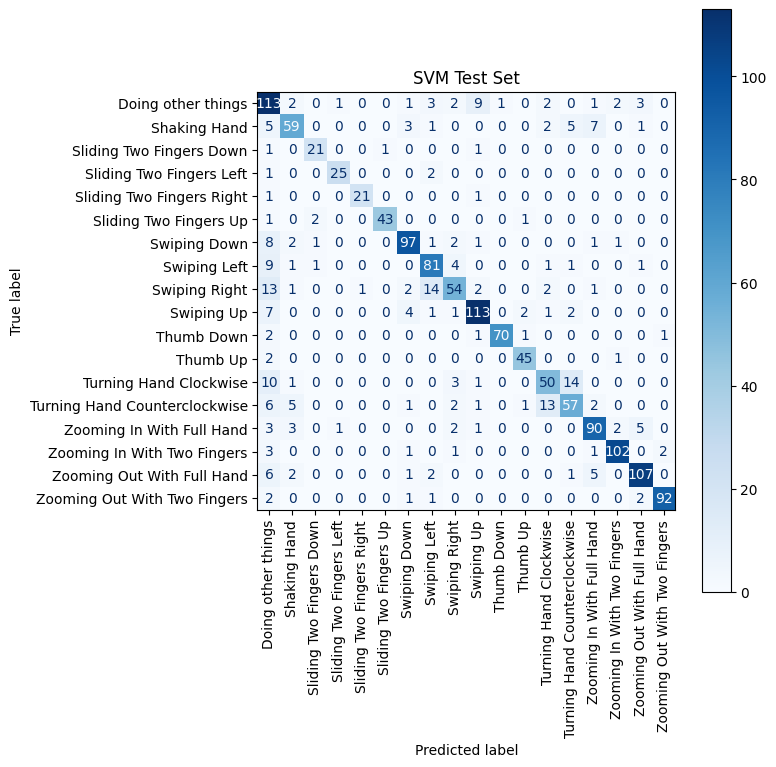

In [16]:
cm_val = confusion_matrix(y_val, y_val_pred)
cm_display_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=label_encoder.classes_)

fig_val, ax_val = plt.subplots(figsize=(8, 8)) # Adjust the figure size as needed
cm_display_val.plot(ax=ax_val, cmap=plt.cm.Blues)
ax_val.set_title("SVM Validation Set")
ax_val.tick_params(axis='x', rotation=90)
ax_val.tick_params(axis='y', rotation=0) # Keep y-axis labels horizontal for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

# 2. Plot Confusion Matrix for the test set
cm_test = confusion_matrix(y_test, y_test_pred)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.classes_)

fig_test, ax_test = plt.subplots(figsize=(8, 8)) # Use the same or adjust figure size
cm_display_test.plot(ax=ax_test, cmap=plt.cm.Blues)
ax_test.set_title("SVM Test Set")
ax_test.tick_params(axis='x', rotation=90)
ax_test.tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print results
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Test Accuracy: 82.23%
Precision: 0.8303
Recall: 0.8223
F1-score: 0.8236
